In [1]:
from base import np
from threeD import Solver3D

# Export figures to Folder
figures_path = "../Figures/Nutrients3D/"

# Results for Different Diffusion Rates
Using the non-dimentionalised equation:
$$
\nabla^2 n(r) - \alpha n(r) c(r) = 0
$$

Comparing the consumption timescale to the diffusion's:
$$
T_c = \frac{1}{\alpha}
$$
$$
\left(
    D \overset{!}{=} 1
    \quad \Rightarrow \quad
    T_d = \frac{(R_{\infty}-R_{\text{Diatom}})^2}{D} \overset{?}{\to} \infty \right
)
$$

We get:
$$
\frac{T_{c}}{T_{d}} = 
\begin{cases} 
    \gg 1,  \;  \text{consumption domiation}  \\
    \sim 1, \;  \text{ comparable time scales} \\
    \ll 1,  \;  \text{diffusion domination}
    
\end{cases}
$$
<!--
⚠️⚠️⚠️
$$
\implies
T_c =
\begin{cases} 
10 \\ 
1 \\ 
0.1 
\end{cases}
\; \& \; T_d = 1

\implies
\alpha = 
\begin{cases} 
0.1 \\ 
1 \\ 
10 
\end{cases}
$$
⚠️⚠️⚠️
-->

In [2]:
syst_params = {
'R_dtm' : 1, 'R_inf' : 1e2,
'Tc': 1e-3,
'nr': 200,
}
R_dtm, R_inf = syst_params['R_dtm'], syst_params['R_inf']

T_d = (R_inf - R_dtm)**2 / (3*1) # D=1
print(f"Diffusion Time:    T_d   = {T_d} ~ {T_d:.0e}")
print(f"Timescales \t T_c/T_d = {syst_params['Tc']/T_d:.4e}")

Diffusion Time:    T_d   = 3267.0 ~ 3e+03
Timescales 	 T_c/T_d = 3.0609e-07


In [3]:
def c_const(r):
    '''Does not make physical sense, but it is useful for testing purposes'''
    return np.ones_like(r)
def c_exp(r):
    '''Explained in 3D_02'''
    λ = 1 # > 0
    A = 1 / (4 * np.pi * λ * r**2)
    return A * np.exp( (R_dtm - r)/λ )
def c_layer(r):
    r0 = 10 # Starting point of the step
    l  = 20 # Length of the step
    cond = (r >= r0) & (r <= r0 + l)
    c = 3/(4*np.pi) * 1/(l**3 + 3 * l**2 * r0 + 3 * l * r0**2)
    return np.where(cond , c , 0)

c_func = [c_const, c_exp, c_layer][2]

### $T_c/T_d \approx 1$

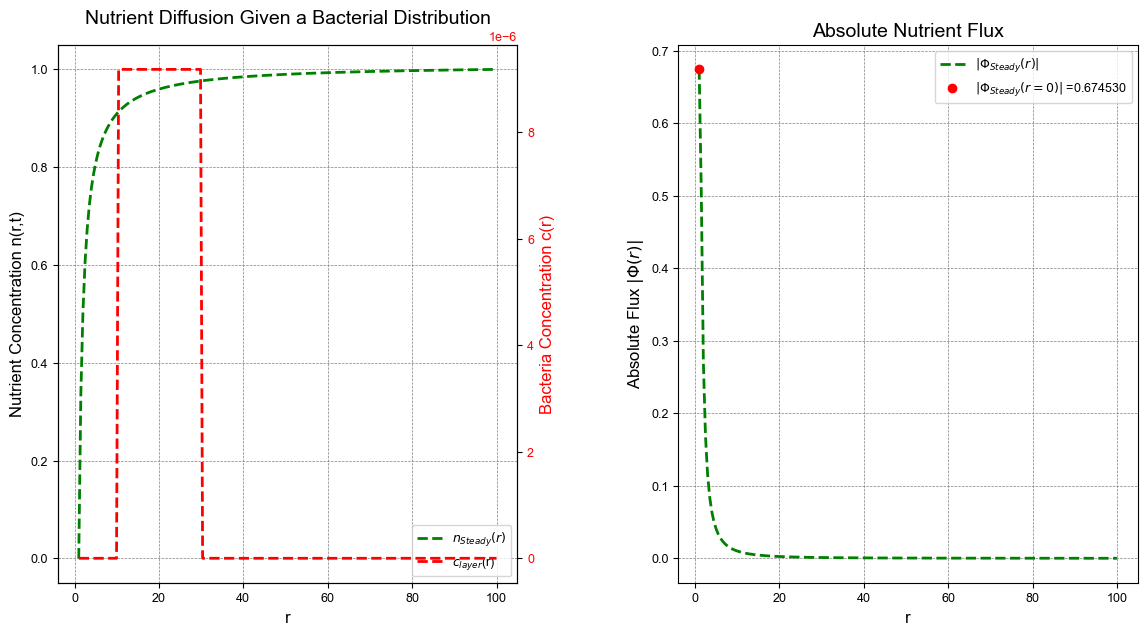

In [4]:
syst_params['Tc'] = 1e4

S3D = Solver3D(syst_params, c_func)
S3D.ode.solve()
S3D.plot.double_plot()

In [8]:
np.mean(S3D.c)

1.8364031895218692e-06

### Consumption or Diffusion Domination

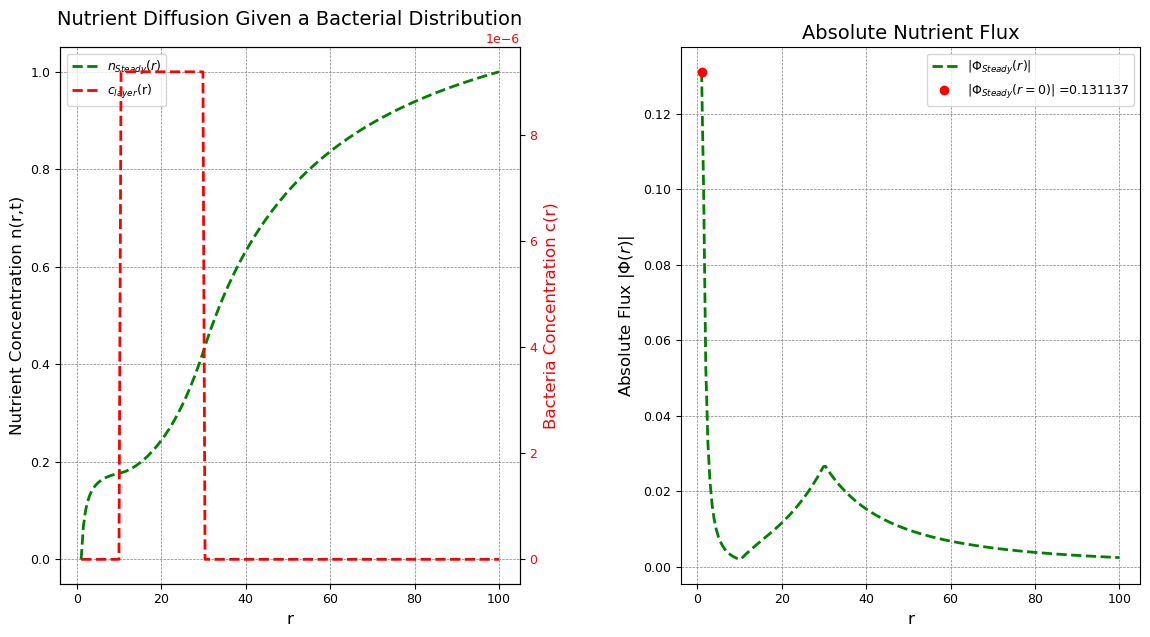

In [21]:
syst_params['Tc'] = 1e-3

S3D = Solver3D(syst_params, c_func)
S3D.ode.solve()
S3D.plot.double_plot()

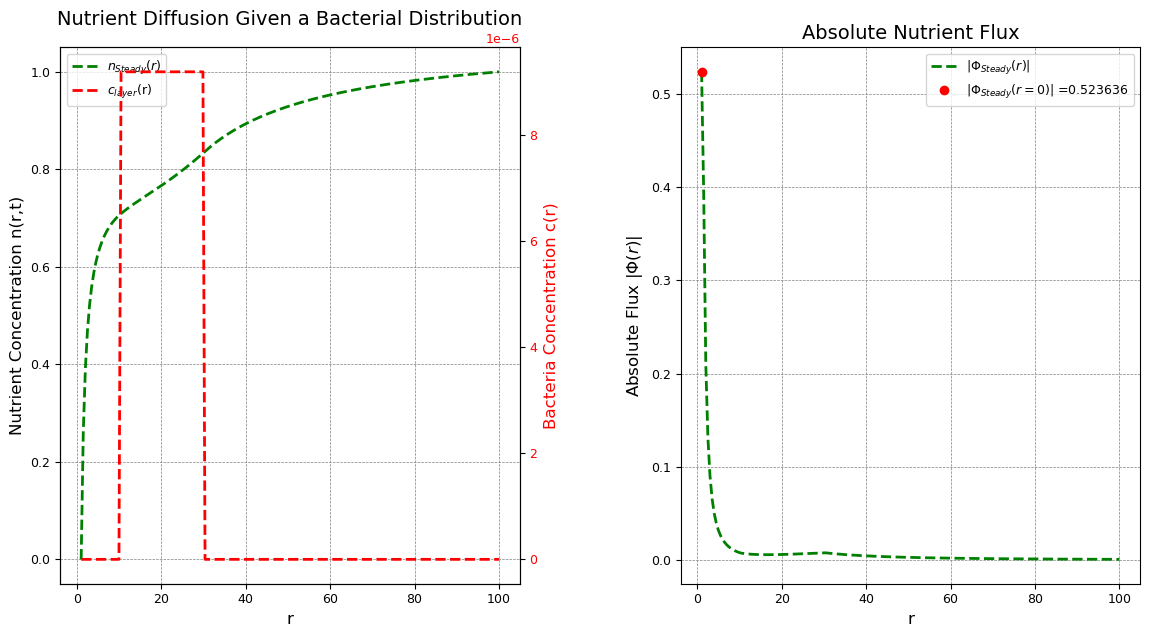

In [22]:
syst_params['Tc'] = 1e-2

S3D = Solver3D(syst_params, c_func)
S3D.ode.solve()
S3D.plot.double_plot()

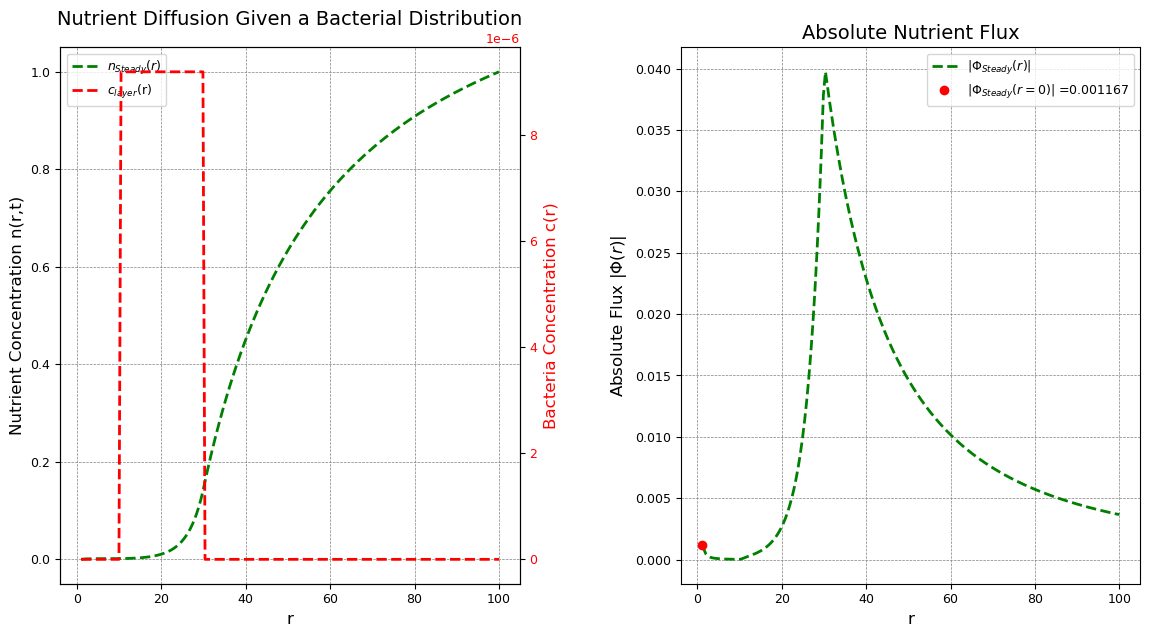

In [23]:
syst_params['Tc'] = 1e-4

S3D = Solver3D(syst_params, c_func)
S3D.ode.solve()
S3D.plot.double_plot()